In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
import seaborn as sns

In [2]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [5]:
X_data = X_data.drop(np.where(y_data==1)[0][:-45])

In [6]:
y_data = y_data.drop(np.where(y_data==1)[0][:-45])

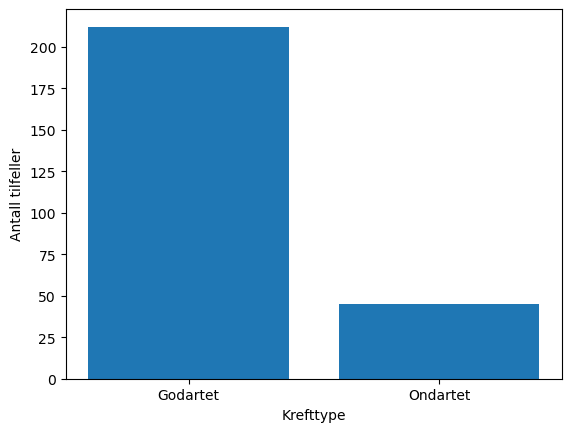

In [7]:
plt.bar(x=np.unique(y_data, return_counts=True)[0], height= np.unique(y_data, return_counts=True)[1])
plt.xticks([0,1],["Godartet", "Ondartet"])
plt.xlabel("Krefttype")
plt.ylabel("Antall tilfeller")
plt.savefig("unbalanced.png")
plt.show()

In [8]:
ondartet = (np.unique(y_data, return_counts=True)[1][1]/np.unique(y_data, return_counts=True)[1][0]).round(2)
print("{} % godartet og {} % ondartet".format(ondartet*100, 100*(1-ondartet).round(2)))

21.0 % godartet og 79.0 % ondartet


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [10]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
379,11.08,18.83,73.30,361.6,0.12160,0.2154,0.1689,0.06367,0.2196,0.07950,...,13.24,32.82,91.76,508.1,0.2184,0.9379,0.8402,0.2524,0.4154,0.14030
389,19.55,23.21,128.90,1174.0,0.10100,0.1318,0.1856,0.10210,0.1989,0.05884,...,20.82,30.44,142.00,1313.0,0.1251,0.2414,0.3829,0.1825,0.2576,0.07602
541,14.47,24.99,95.81,656.4,0.08837,0.1230,0.1009,0.03890,0.1872,0.06341,...,16.22,31.73,113.50,808.9,0.1340,0.4202,0.4040,0.1205,0.3187,0.10230
213,17.42,25.56,114.50,948.0,0.10060,0.1146,0.1682,0.06597,0.1308,0.05866,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818
259,15.53,33.56,103.70,744.9,0.10630,0.1639,0.1751,0.08399,0.2091,0.06650,...,18.49,49.54,126.30,1035.0,0.1883,0.5564,0.5703,0.2014,0.3512,0.12040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,13.81,23.75,91.56,597.8,0.13230,0.1768,0.1558,0.09176,0.2251,0.07421,...,19.20,41.85,128.50,1153.0,0.2226,0.5209,0.4646,0.2013,0.4432,0.10860
14,13.73,22.61,93.60,578.3,0.11310,0.2293,0.2128,0.08025,0.2069,0.07682,...,15.03,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.2208,0.3596,0.14310
180,27.22,21.87,182.10,2250.0,0.10940,0.1914,0.2871,0.18780,0.1800,0.05770,...,33.12,32.85,220.80,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
433,18.82,21.97,123.70,1110.0,0.10180,0.1389,0.1594,0.08744,0.1943,0.06132,...,22.66,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.1708,0.3007,0.08314


In [11]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report, roc_curve, roc_auc_score

In [12]:
!pip install -U imbalanced-learn

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
sampler = SMOTE(random_state=1,k_neighbors=5)
X_train_upsample, y_train_upsample = sampler.fit_resample(X_train, y_train)

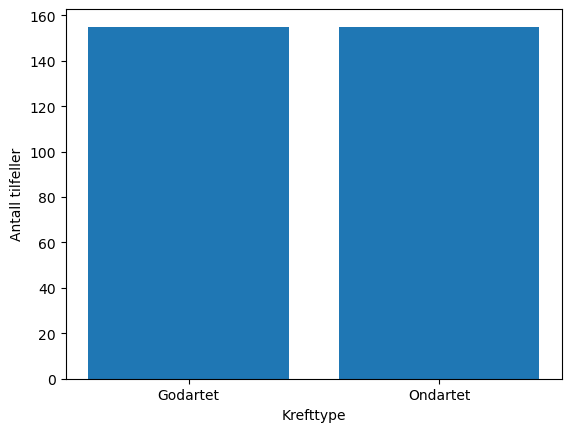

In [15]:
plt.bar(x=np.unique(y_train_upsample, return_counts=True)[0], height= np.unique(y_train_upsample, return_counts=True)[1])
plt.xticks([0,1],["Godartet", "Ondartet"])
plt.xlabel("Krefttype")
plt.ylabel("Antall tilfeller")
plt.savefig("unbalanced.png")
plt.show()

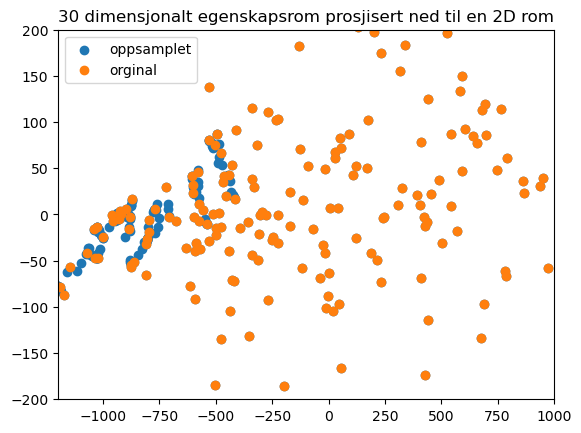

In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_train)
X_projected = pca.transform(X_train)
X_upsample_projected = pca.transform(X_train_upsample)

plt.title("30 dimensjonalt egenskapsrom prosjisert ned til en 2D rom")
plt.scatter(X_upsample_projected[:,0],X_upsample_projected[:,1], color="C0", alpha=1, label="oppsamplet")
plt.scatter(X_projected[:,0],X_projected[:,1], color="C1", alpha=1,label="orginal")
plt.xlim(-1200,1000)
plt.ylim(-200,200)
plt.legend()
plt.show()

In [17]:
clf = MLPClassifier(random_state=1,solver="sgd",learning_rate="adaptive", max_iter=5000)
clf.fit(X_train_upsample, y_train_upsample)
y_test_hat = clf.predict_proba(X_test)[:,1]

In [18]:
print("Nøyaktighet = ",accuracy_score(y_test,(y_test_hat>0.5)*1).round(2))


Nøyaktighet =  0.92


In [19]:
print("Modell som bare predikerer 0 - Nøyaktighet = ", accuracy_score(y_test,np.zeros(len(y_test))).round(2))

Modell som bare predikerer 0 - Nøyaktighet =  0.88


In [20]:
((y_test_hat>0.5)*1).round(2)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [21]:
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1,average='binary').round(2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))

F1-score =  0.74
Sensitivitet =  0.88
Spesifisitet =  0.93
Presisjon =  0.64


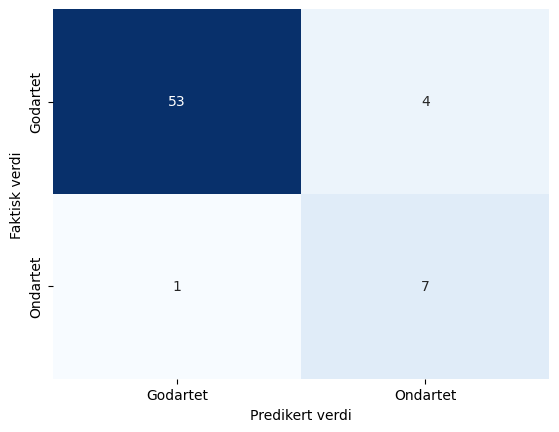

In [25]:
sns.heatmap(confusion_matrix(y_test,(y_test_hat>0.5)*1), annot=True, cbar=False,cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5],["Godartet", "Ondartet"])
plt.yticks([0.5,1.5],["Godartet", "Ondartet"])
plt.show()